In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


fam = pd.read_csv('Family Income and Expenditure.csv')
fam

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41539,119773,XII - SOCCSKSARGEN,44875,Enterpreneurial Activities,1,23675,21542,1476,6120,1632,...,0,0,0,0,0,1,0,0,0,0
41540,137320,XII - SOCCSKSARGEN,31157,Enterpreneurial Activities,1,2691,1273,1886,4386,1840,...,0,0,0,0,0,3,0,0,0,0
41541,133171,XII - SOCCSKSARGEN,45882,Enterpreneurial Activities,2,28646,27339,480,4796,1232,...,0,0,0,0,0,1,0,0,0,0
41542,129500,XII - SOCCSKSARGEN,81416,Enterpreneurial Activities,1,29996,26655,2359,17730,2923,...,0,0,0,0,0,2,0,0,0,0


In [ ]:
fam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Total Household Income                         41544 non-null  int64 
 1   Region                                         41544 non-null  object
 2   Total Food Expenditure                         41544 non-null  int64 
 3   Main Source of Income                          41544 non-null  object
 4   Agricultural Household indicator               41544 non-null  int64 
 5   Bread and Cereals Expenditure                  41544 non-null  int64 
 6   Total Rice Expenditure                         41544 non-null  int64 
 7   Meat Expenditure                               41544 non-null  int64 
 8   Total Fish and  marine products Expenditure    41544 non-null  int64 
 9   Fruit Expenditure                              41544 non-null

In [ ]:
print(fam.head())
print(fam.info())
print(fam.describe())

   Total Household Income Region  Total Food Expenditure  \
0                  480332    CAR                  117848   
1                  198235    CAR                   67766   
2                   82785    CAR                   61609   
3                  107589    CAR                   78189   
4                  189322    CAR                   94625   

  Main Source of Income  Agricultural Household indicator  \
0         Wage/Salaries                                 0   
1         Wage/Salaries                                 0   
2         Wage/Salaries                                 1   
3         Wage/Salaries                                 0   
4         Wage/Salaries                                 0   

   Bread and Cereals Expenditure  Total Rice Expenditure  Meat Expenditure  \
0                          42140                   38300             24676   
1                          17329                   13008             17434   
2                          34182      

In [ ]:
# Count missing values
fam.isnull().sum()

Total Household Income                              0
Region                                              0
Total Food Expenditure                              0
Main Source of Income                               0
Agricultural Household indicator                    0
Bread and Cereals Expenditure                       0
Total Rice Expenditure                              0
Meat Expenditure                                    0
Total Fish and  marine products Expenditure         0
Fruit Expenditure                                   0
Vegetables Expenditure                              0
Restaurant and hotels Expenditure                   0
Alcoholic Beverages Expenditure                     0
Tobacco Expenditure                                 0
Clothing, Footwear and Other Wear Expenditure       0
Housing and water Expenditure                       0
Imputed House Rental Value                          0
Medical Care Expenditure                            0
Transportation Expenditure  

In [7]:
income_col = fam["Total Household Income"]
expend_col = "Total Food Expenditure"

mean_income = income_col.mean()
median_income = income_col.median()

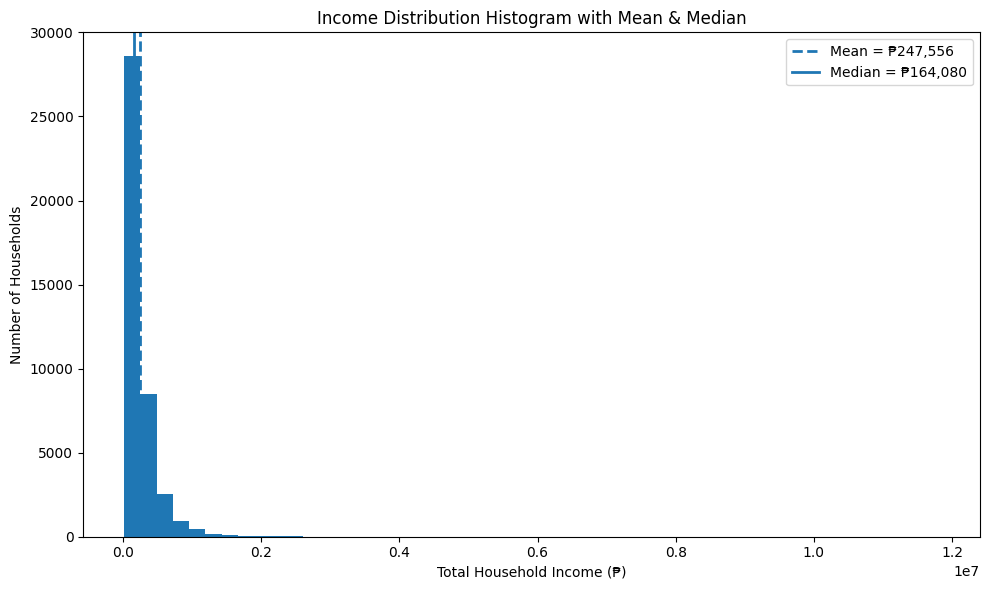

In [9]:
plt.figure(figsize=(10,6))
plt.hist(income_col, bins=50)
plt.axvline(mean_income, linestyle='--', linewidth=2, label=f"Mean = ₱{mean_income:,.0f}")
plt.axvline(median_income, linestyle='-', linewidth=2, label=f"Median = ₱{median_income:,.0f}")
plt.xlabel("Total Household Income (₱)")
plt.ylabel("Number of Households")
plt.title("Income Distribution Histogram with Mean & Median")
plt.legend()
plt.tight_layout()
plt.show()

The highest recorded income is $8.9 million, while the lowest is $2,000. This data generates a mean average of $244,817, and the median is lower at $191,600. This indicates a positive skew, meaning the dataset comprises many lower-income individuals and a limited number of high earners.

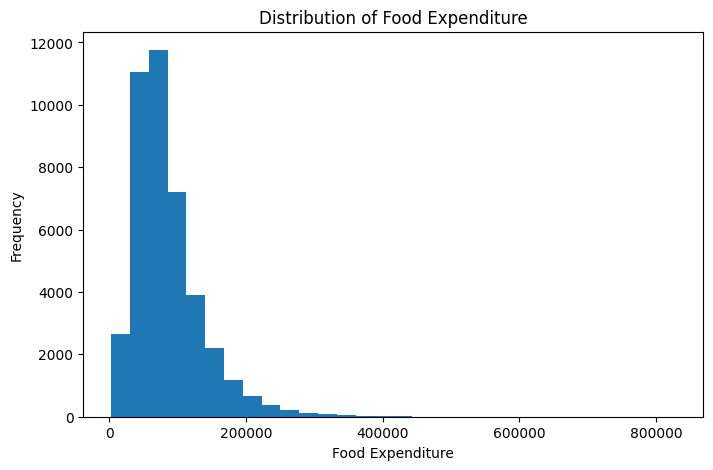

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(fam[expend_col], bins=30)
plt.title("Distribution of Food Expenditure")
plt.xlabel("Food Expenditure")
plt.ylabel("Frequency")
plt.show()


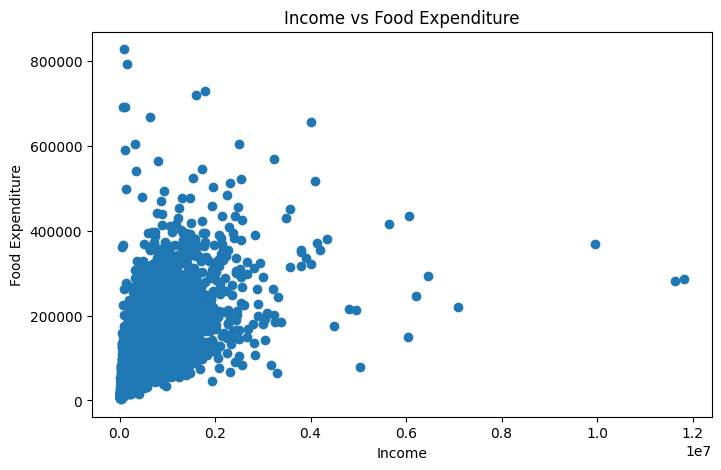

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(fam[income_col], fam[expend_col])
plt.title("Income vs Food Expenditure")
plt.xlabel("Income")
plt.ylabel("Food Expenditure")
plt.show()


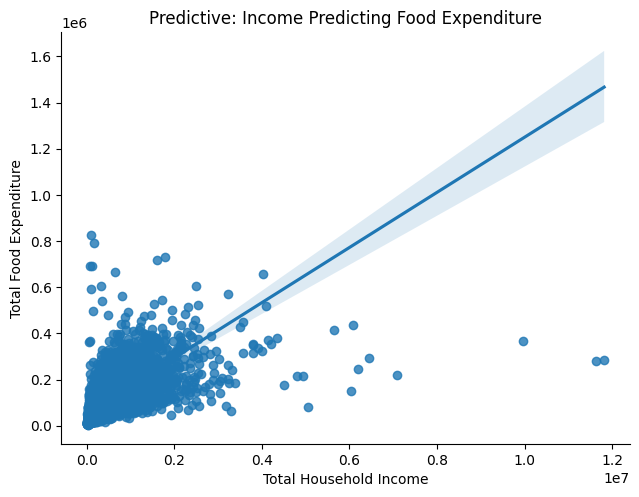

In [ ]:
sns.lmplot(x=income_col, y=expend_col, data=fam, height=5, aspect=1.3)
plt.title("Predictive: Income Predicting Food Expenditure")
plt.show()


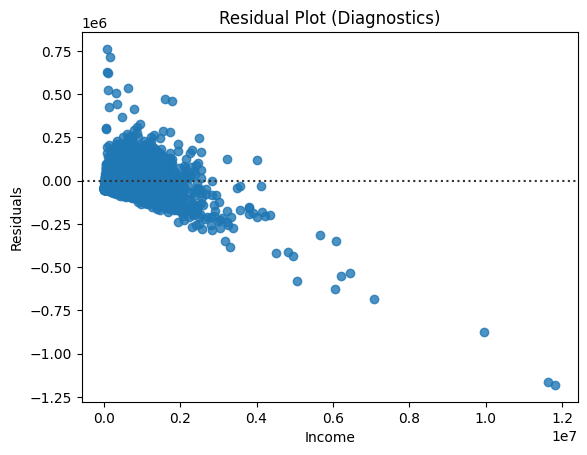

In [ ]:
sns.residplot(x=fam[income_col], y=fam[expend_col])
plt.title("Residual Plot (Diagnostics)")
plt.xlabel("Income")
plt.ylabel("Residuals")
plt.show()


In [ ]:
# Scatter plot with regression line
sns.lmplot(x='Total_Household_Income', y='Total_Food_Expenditure', data=fam, height=5, aspect=1.3)
plt.title("Income vs Food Expenditure")
plt.show()

# Correlation
corr_income_food = fam[['Total_Household_Income', 'Total_Food_Expenditure']].corr().iloc[0,1]
print("Correlation between Income and Food Expenditure:", corr_income_food)

KeyError: "None of [Index(['Total_Food_Expenditure', 'Total_Household_Income'], dtype='object')] are in the [columns]"

<h2> Families with higher household income tend to spend more on food. Correlation gives a quantitative measure of this relationship. </h2>

In [ ]:
sns.scatterplot(x='Total_Number_of_Family_members', y='Total_Food_Expenditure', data=fam)
plt.title("Food Expenditure vs Household Size")
plt.show()

<h2>Larger households tend to have higher total food expenditure, though expenditure per capita may decrease slightly.</h2>

In [ ]:
sns.boxplot(x='Agricultural_Household_indicator', y='Total_Food_Expenditure', data=fam)
plt.title("Food Expenditure by Agricultural Household")
plt.show()


<h2>Non-agricultural households tend to spend more on food than agricultural households, possibly due to more stable or higher income sources.</h2>

In [ ]:
food_cols = ['Bread_and_Cereals_Expenditure', 'Total_Rice_Expenditure', 'Meat_Expenditure', 
             'Total_Fish_and__marine_products_Expenditure', 'Fruit_Expenditure', 'Vegetables_Expenditure']

avg_food = fam[food_cols].mean()
avg_food.plot(kind='pie', autopct='%1.1f%%', figsize=(7,7), startangle=90, colors=sns.color_palette('pastel'))
plt.title("Average Food Expenditure Composition")
plt.ylabel("")
plt.show()


<h2> Rice and cereals dominate household food spending, while fruits and vegetables make up a smaller proportion.</h2>

In [ ]:
# Sum food expenditure per household
fam['Total_Food_Expenditure_Sum'] = fam[food_cols].sum(axis=1)

# Average total food expenditure by household size
avg_exp_size = fam.groupby('Total_Number_of_Family_members')['Total_Food_Expenditure_Sum'].mean()

# Plot line chart
avg_exp_size.plot(kind='line', marker='o', figsize=(10,5))
plt.title("Average Total Food Expenditure by Household Size")
plt.xlabel("Household Size")
plt.ylabel("Average Food Expenditure")
plt.grid(True)
plt.show()


<h2> Total food expenditure rises with household size; larger families spend more overall, though per-capita spending may decrease slightly.</h2>

In [ ]:
avg_income_region = fam.groupby('Region')['Total_Household_Income'].mean().sort_values(ascending=False).head(5)
avg_income_region.plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title("Top 5 Regions by Average Household Income")
plt.ylabel("Average Income")
plt.xlabel("Region")
plt.show()


<h2>Certain regions consistently have higher household incomes, indicating regional economic disparities.</h2>

In [ ]:
electricity_counts = fam['Electricity'].value_counts()
electricity_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), startangle=90, colors=['gold','lightgrey'])
plt.title("Households with Electricity")
plt.ylabel("")
plt.show()


<h2>Majority of households have electricity, but a small fraction still lacks access, highlighting infrastructure gaps.</h2>

In [ ]:
asset_cols = ['Number_of_Refrigerator/Freezer', 'Number_of_Motorcycle/Tricycle', 'Number_of_Cellular_phone']
asset_counts = fam[asset_cols].sum()
asset_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(7,7), startangle=90, colors=sns.color_palette('pastel'))
plt.title("Distribution of Major Household Assets")
plt.ylabel("")
plt.show()


<h2>Refrigerators and cellular phones are the most common household assets; motorcycles are less widespread.</h2>

In [ ]:
avg_meat_region = fam.groupby('Region')['Meat_Expenditure'].mean().sort_values(ascending=False)
avg_meat_region.plot(kind='bar', figsize=(12,6), color='salmon')
plt.title("Average Meat Expenditure by Region")
plt.xlabel("Region")
plt.ylabel("Average Meat Expenditure")
plt.xticks(rotation=45)
plt.show()


<h2>Certain regions spend more on meat, possibly due to dietary preferences or higher income.</h2>

In [ ]:
avg_rice_size = fam.groupby('Total_Number_of_Family_members')['Total_Rice_Expenditure'].mean()
avg_rice_size.plot(kind='line', marker='o', figsize=(10,5), color='brown')
plt.title("Average Rice Expenditure by Household Size")
plt.xlabel("Number of Family Members")
plt.ylabel("Average Rice Expenditure")
plt.grid(True)
plt.show()

<h2>Rice expenditure rises with family size, plateauing in very large households.</h2>